# Introduction
I've been learning Turkish for almost 4 weeks now, and I find the sound of the language quite harsh. I wanted to see if I could quantify the reason for this.

My hypothesis is that Turkish sounds harsher because it has more plosive sounds- sounds like "B" and "T" that require you to shoot out a jet of air to say them. These sounds break the flow of a word, and could possibly contribute to a language sounding more jagged, and maybe harsher.

# Methods
I tried to resolve this experimentally: by taking samples of actual text, I will count the frequency of plosives in both languages and compare. Basically I am using a corpus method (instead of some more theoretical method).

The English corpus I used is the nltk reuter's news corpus. For Turkish, since I don't know much of the language, I just used a Turkish corpus I found online (TS Corpus V_2 , at http://cqpweb.tscorpus.com/cqpweb/). Note that this accessing the corpus requires registering for an account (I am pretty sure).

# Conclusions
It is really hard to say if this is true. Counting overall plosives, English actually has **more** plosives than Turkish! This is because English uses the letters P and T **way** more than Turkish. This is the exact opposite of what I expected.

On the other hand, if you count just plosives in the middle of a word, then Turkish beats English (taking into account that Turkish words are often longer than English words). This could explain why individual words in Turkish often sound kind of hard. But the difference is only a few percent on average, which means this difference might not be significant.

**Overall conclusions**: Turkish does *not* use plosive sounds significantly more than English, although they are slightly more prominent in the middle of words than in English.

# TODO for the future
Compare plosives from other languages.

In [1]:
# Imports
import nltk
import matplotlib.pyplot as plt
import re
import tabulate
import csv
import codecs
import numpy as np

# English Plosives
Go into the reuter's corpus and count plosives

In [2]:
# Load corpus and set up plosive sounds
from nltk.corpus import reuters
cmu_entries = nltk.corpus.cmudict.entries()
cmu_dict = dict(cmu_entries)
plosive_sounds_en = list('BDGKPT') + ['JH', 'CH']

In [3]:
# Go through the reuters corpus and make a frequency distribution
# of the different sounds
en_phon_fd = nltk.FreqDist()
for f_id in reuters.fileids():
    words = reuters.words(f_id)
    for w_upper in words:
        w = w_upper.lower()
        try:
            phonemes = cmu_dict[w]
            en_phon_fd.update(phonemes)
        except KeyError:
            pass

In [4]:
en_norm_freq = {key : value / en_phon_fd.N() for key, value in en_phon_fd.items()}

In [5]:
# Tabulate the plosives
fmt_str = "{:0>5.2f}%"
en_table = [[ps, fmt_str.format(en_norm_freq[ps]*100)]
         for ps in plosive_sounds_en]
plosive_total = sum([en_norm_freq[ps] for ps in plosive_sounds_en])
en_table.append(["Total", fmt_str.format(plosive_total*100)])
print(tabulate.tabulate(en_table))

-----  ------
B      01.74%
D      04.51%
G      00.77%
K      03.88%
P      02.62%
T      06.97%
JH     00.64%
CH     00.50%
Total  21.64%
-----  ------


# Turkish Plosives

Link to text corpus resource: http://cqpweb.tscorpus.com/cqpweb/

How I filterd the corpus:
- removed all words with 1 use only
- made all words lowercase (normalization)
- removed most non-alphabetic words (punctuation, words with numbers/emojis, some Chinese/Arabic characters) (*wanted to remove them all but that was difficult, because some of the turkish letters had weird accents*)

In [6]:
tr_alphabet = "A B C Ç D E F G Ğ H I İ J K L M N O Ö P R S Ş T U Ü V Y Z".lower().split()
tr_plosives = list("BCÇDGKPT".lower())

In [7]:
# Load Turkish frequency list
from collections import defaultdict
with codecs.open('tr_freq_list.txt', 'r', 'UTF-8') as f:
    reader = csv.reader(f)
    tr_letter_fd = defaultdict(int)
    for row in reader:
        n = int(row[1])
        for letter in row[0]:
            tr_letter_fd[letter] = tr_letter_fd[letter] + n

In [8]:
# Check to make sure that most of the words are proper turkish words
turkish_total = 0
for l in tr_alphabet:
    turkish_total += tr_letter_fd[l]
total_letters = sum([val for key, val in tr_letter_fd.items()])
print("Percent of letters that are proper turkish: {:.2f}%".format(turkish_total/total_letters*100))

# Make normalized dictionary
tr_norm_freq = {letter: freq/total_letters
                for letter, freq in tr_letter_fd.items()
               }

Percent of letters that are proper turkish: 94.99%


In [9]:
# Get the statistics on plosives
fmt_str = "{:0>5.2f}%"
tr_table = [[ps, fmt_str.format(tr_norm_freq[ps]*100)]
         for ps in tr_plosives]
plosive_total = sum([tr_norm_freq[ps] for ps in tr_plosives])
tr_table.append(["Total", fmt_str.format(plosive_total*100)])
print(tabulate.tabulate(tr_table))

-----  ------
b      02.40%
c      01.38%
ç      00.72%
d      04.12%
g      01.60%
k      04.64%
p      00.91%
t      03.58%
Total  19.35%
-----  ------


# Comparison of the Two

In [10]:
en_tr_dict = {'B' : 'b', 'D': 'd', 'G': 'g', "K": 'k', "P": 'p', "T": 't', "JH": "c", "CH": "ç"}
def plosive_comparison_table(en_plosive_sounds):
    compare_table = [[ps, fmt_str.format(en_norm_freq[ps]*100), 
                      en_tr_dict[ps], fmt_str.format(tr_norm_freq[en_tr_dict[ps]]*100)] 
                     for ps in en_plosive_sounds]
    print(tabulate.tabulate(compare_table, headers="Sound En% Tr_Equiv Tr%".split()))
plosive_comparison_table(plosive_sounds_en)

Sound    En%     Tr_Equiv    Tr%
-------  ------  ----------  ------
B        01.74%  b           02.40%
D        04.51%  d           04.12%
G        00.77%  g           01.60%
K        03.88%  k           04.64%
P        02.62%  p           00.91%
T        06.97%  t           03.58%
JH       00.64%  c           01.38%
CH       00.50%  ç           00.72%


In [11]:
# Unvoiced
plosive_comparison_table(list('PKT')+['CH'])

Sound    En%     Tr_Equiv    Tr%
-------  ------  ----------  ------
P        02.62%  p           00.91%
K        03.88%  k           04.64%
T        06.97%  t           03.58%
CH       00.50%  ç           00.72%


In [12]:
# Voiced
plosive_comparison_table(list('BGD')+['JH'])

Sound    En%     Tr_Equiv    Tr%
-------  ------  ----------  ------
B        01.74%  b           02.40%
G        00.77%  g           01.60%
D        04.51%  d           04.12%
JH       00.64%  c           01.38%


# Try comparing plosives in the middle of words under a certain number phonemes long
Calculate a "central plosive density"- the average number of plosives in the middle of a word

We have to limit the number of phonemes since turkish has hugely long words, so eventually Turkish's ratio will get very high just due to that.

To measure this effect, I calculate the ratios limiting the number of phonemes to certain values, to see if the effect is robust at high and low values.

In [13]:
def get_avg_plosive_density_en_tr(max_phoneme_length):
    # Calculate plosive density for English
    en_plosive_density_list = []
    for f_id in reuters.fileids():
        words = reuters.words(f_id)
        for w_upper in words:
            w = w_upper.lower()
            try:
                phonemes = cmu_dict[w]
                if len(phonemes) < max_phoneme_length:
                    p_count = 0
                    for p in phonemes[1:-1]:
                        if p in plosive_sounds_en:
                            p_count += 1
                    en_plosive_density_list.append(p_count/len(phonemes))
            except KeyError:
                pass
    en_avg_plosive_density = np.average(en_plosive_density_list)

    # Calculate plosive density for turkish
    tr_plosive_density_list = []
    tr_weights = []
    with codecs.open('tr_freq_list.txt', 'r', 'UTF-8') as f:
        reader = csv.reader(f)
        tr_letter_fd = defaultdict(int)
        for row in reader:
            n = int(row[1])
            word = row[0]
            if len(word) < max_phoneme_length:
                l_count = 0
                for l in word[1:-1]:
                    if l in tr_plosives:
                        l_count += 1
                tr_plosive_density_list.append(l_count/len(word))
                tr_weights.append(n)
    tr_avg_plosive_density = np.average(tr_plosive_density_list, weights=tr_weights)
    
    return en_avg_plosive_density, tr_avg_plosive_density

In [14]:
# Calculate for a few
central_plosive_comparison_table = []
for x in range(5, 17, 2):
    central_plosive_comparison_table.append([x]+list(get_avg_plosive_density_en_tr(x)))

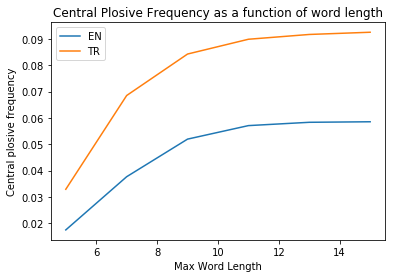

In [15]:
plt.plot([a[0] for a in central_plosive_comparison_table], [a[1] for a in central_plosive_comparison_table], label="EN")
plt.plot([a[0] for a in central_plosive_comparison_table], [a[2] for a in central_plosive_comparison_table], label="TR")
plt.legend()
plt.title("Central Plosive Frequency as a function of word length")
plt.xlabel("Max Word Length")
plt.ylabel("Central plosive frequency")
plt.show()